Доля объясненной дисперсии: [0.50009505 0.19261575 0.15330702 0.07924741 0.05189488 0.02283989]
Вклад каждой переменной: [[ 0.06303652  0.30625477  0.43460944  0.51430568  0.51022671  0.43417441]
 [ 0.56044261  0.58580658  0.33703656 -0.11142298 -0.27765863 -0.37367325]
 [ 0.82321799 -0.38266201 -0.28778488 -0.01448217  0.17610451  0.24867501]
 [-0.05770025  0.59235066 -0.48011024 -0.38817478  0.01425851  0.5142009 ]
 [-0.00476869 -0.25609994  0.60364406 -0.48919658 -0.28955013  0.49684139]
 [-0.02984228 -0.01191495  0.14074399 -0.57695052  0.73994527 -0.31427328]]
Доля объясненной дисперсии для выбранных параметров: [0.50741913 0.49258087]
Вклад каждой переменной для выбранных параметров: [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
Разница в доле объясненной дисперсии: -1.1102230246251565e-16


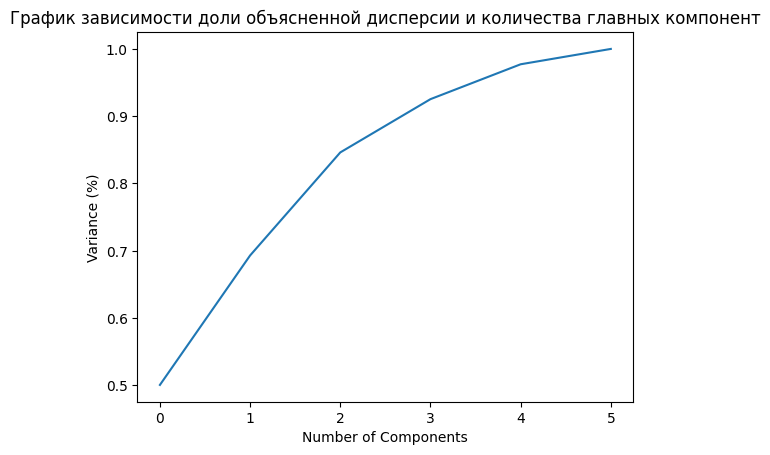

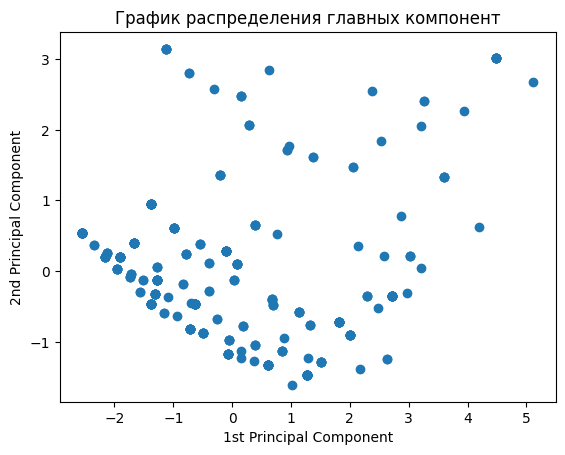

In [3]:
# Загрузка необходимых библиотек и датасета
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


data = pd.read_csv("biofam.csv", delimiter = ';')

# Проведение предварительного анализа данных и очистки данных
data = data.replace('?', np.nan) # замена пропущенных значений на NaN
data = data.dropna() # удаление строк с пропущенными значениями

# Выбор переменных для PCA
variables = ['a16', 'a20', 'a22', 'a25', 'a27', 'a30']

# Нормализация данных
norm_data = (data[variables] - data[variables].mean()) / data[variables].std()

# Выполнение PCA
pca = PCA()
pca.fit(norm_data)

# Выделение главных компонент
components = pca.components_
scores = pca.transform(norm_data)

# Производим интерпретацию полученных результатов
print('Доля объясненной дисперсии:', pca.explained_variance_ratio_)
print('Вклад каждой переменной:', components)

# Выбор двух коррелирующих параметров
corr_variables = ['a16', 'a30']

# Выделение выбранных параметров
corr_data = norm_data[corr_variables]

# Выполнение PCA для выбранных параметров
corr_pca = PCA()
corr_pca.fit(corr_data)

# Выделение главных компонент для выбранных параметров
corr_components = corr_pca.components_
corr_scores = corr_pca.transform(corr_data)

# Производим интерпретацию полученных результатов
print('Доля объясненной дисперсии для выбранных параметров:', corr_pca.explained_variance_ratio_)
print('Вклад каждой переменной для выбранных параметров:', corr_components)

# Сравнение результатов
print('Разница в доле объясненной дисперсии:', pca.explained_variance_ratio_.sum() - corr_pca.explained_variance_ratio_.sum())
# График зависимости доли объясненной дисперсии и количества главных компонент
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('График зависимости доли объясненной дисперсии и количества главных компонент')
plt.show()

# График распределения главных компонент
plt.scatter(scores[:, 0], scores[:, 1])
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('График распределения главных компонент')
plt.show()